In [54]:
import pandas as pd
import pickle
import seaborn as sns
from wordcloud import WordCloud , STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score , classification_report
from sklearn.svm import SVC
import nltk
import re
import warnings
warnings.filterwarnings("ignore")

In [55]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [56]:
data = pd.read_csv("BBC News.csv")

In [57]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


# Undersyanding Features and Target Variables

In [58]:
data['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [59]:
data.shape

(1490, 3)

In [60]:
 data.dtypes

ArticleId     int64
Text         object
Category     object
dtype: object

# Checking For NULL Values

In [61]:
data.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

# CountPlot Of Target Variable(Category)

<AxesSubplot:xlabel='Category', ylabel='count'>

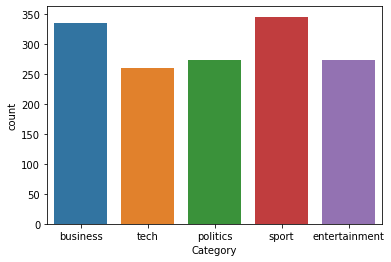

In [62]:
sns.countplot(data.Category)

In [63]:
data['News_length'] = data['Text'].str.len()
data['News_length']

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: News_length, Length: 1490, dtype: int64

# Distribution Plot

Text(0.5, 1.0, 'News Length Distribution')

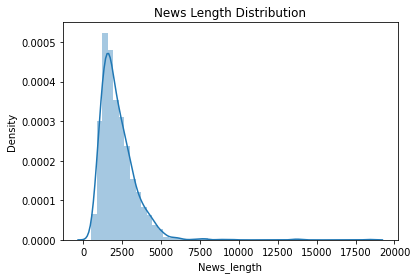

In [64]:
sns.distplot(data['News_length']).set_title('News Length Distribution')

# WordCloud

In [65]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500 , random_state=21 , max_font_size=110 ).generate(words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud , interpolation="bilinear")
    plt.axis('off')
    plt.show()

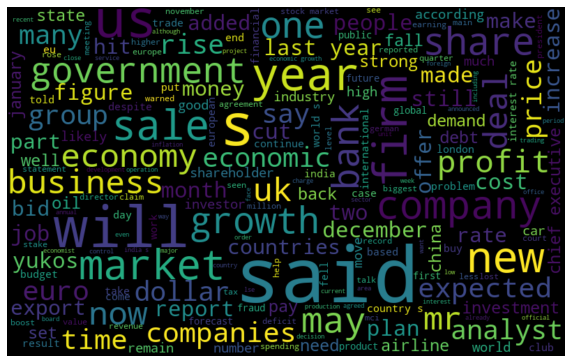

In [66]:
subset = data[data.Category=="business"]
text = subset.Text.values
words = ' '.join(text)
create_wordcloud(words)

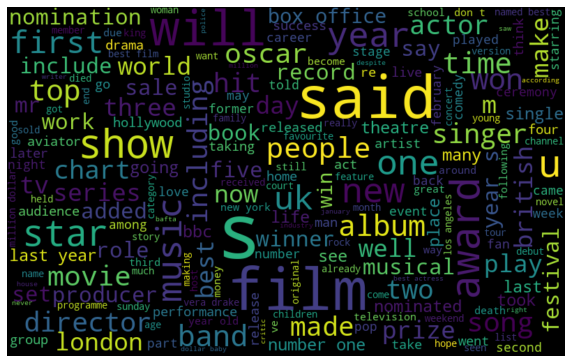

In [67]:
subset = data[data.Category=="entertainment"]
text = subset.Text.values
words = ' '.join(text)
create_wordcloud(words)

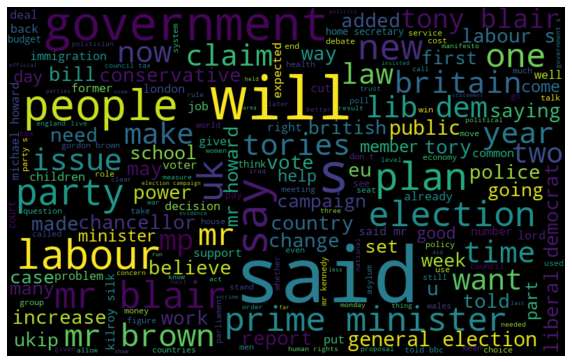

In [68]:
subset = data[data.Category=="politics"]
text = subset.Text.values
words = ' '.join(text)
create_wordcloud(words)

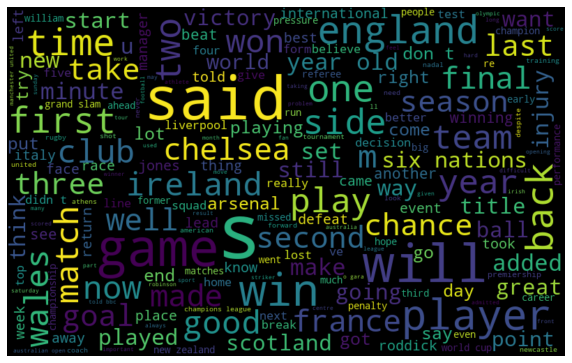

In [69]:
subset = data[data.Category=="sport"]
text = subset.Text.values
words = ' '.join(text)
create_wordcloud(words)

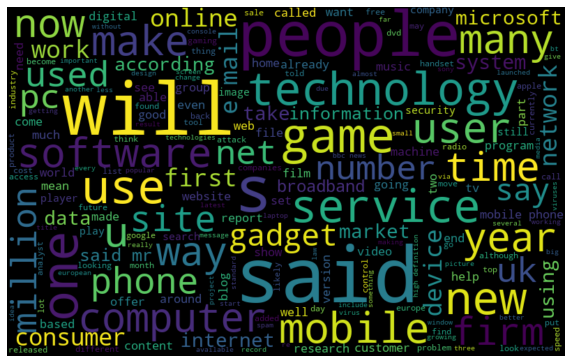

In [70]:
subset = data[data.Category=="tech"]
text = subset.Text.values
words = ' '.join(text)
create_wordcloud(words)

# Preprocessing Data / Cleaning Data

In [71]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +',' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    
#    filtered_sentence = []
#    for w in word_tokens: 
#        if w not in stop_words:
#            filtered.sentence.append(w)
            
    text = ' '.join(filtered_sentence)
    return text

In [72]:
data['Text_parsed'] =data['Text'].apply(process_text)

In [73]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...


# Label Encoding 

In [74]:
label_encoder = preprocessing.LabelEncoder()
data['Category_Target'] = label_encoder.fit_transform(data['Category'])

In [75]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed,Category_Target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


In [76]:
data.to_csv('BBC_News_Preprocessed.csv')

# Split the data in Training and Testing 

In [77]:
X_train , X_test , y_train ,y_test = train_test_split(data['Text_parsed'], 
                                                      data['Category_Target'], 
                                                      test_size = 0.2 ,
                                                      random_state = 8)

In [78]:
X_train.shape

(1192,)

In [79]:
X_test.shape

(298,)

In [80]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [81]:
tfidf = TfidfVectorizer(encoding = 'utf-8',
                        ngram_range = ngram_range ,
                        stop_words = None ,
                        lowercase = False ,
                        max_df = max_df ,
                        min_df = min_df ,
                        max_features = max_features ,
                        norm = 'l2' , 
                        sublinear_tf = True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

[[0.0894863  0.         0.         ... 0.         0.0463896  0.06766975]
 [0.05501963 0.         0.07169191 ... 0.03972773 0.08176571 0.07044504]
 [0.         0.         0.         ... 0.11423937 0.13886684 0.        ]
 ...
 [0.13256211 0.         0.17273162 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.04393444 0.         0.        ]]
(298, 300)


In [82]:
labels_train.shape

(1192,)

In [83]:
labels_test.shape

(298,)

In [84]:
features_train.shape

(1192, 300)

In [85]:
features_test.shape

(298, 300)

# Building Models

# Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(n_estimators = 500)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9194630872483222
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        76
           1       0.93      0.89      0.91        47
           2       0.89      0.87      0.88        55
           3       0.93      0.97      0.95        65
           4       0.90      0.98      0.94        55

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



In [87]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Hyper Paramater Tuning(Random Forest)

In [88]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [89]:
bestF.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [90]:
from sklearn.ensemble import RandomForestClassifier
model1  = RandomForestClassifier(random_state=1,max_depth= 25, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 300)
model1.fit(features_train, labels_train)
model_predictions = model1.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9228187919463087
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        76
           1       0.93      0.89      0.91        47
           2       0.91      0.91      0.91        55
           3       0.94      0.97      0.95        65
           4       0.91      0.95      0.93        55

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



# Logical Regression

In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1)
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9429530201342282
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.98      0.98        47
           2       0.96      0.87      0.91        55
           3       0.96      0.98      0.97        65
           4       0.91      0.96      0.94        55

    accuracy                           0.94       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



# Hyper Parameter Tuning (Logistic Regression)

In [92]:

param_grid = {'C': [0.1,0.001,1],
    # Create a list of options for the regularization penalty
    'penalty' : ['l1', 'l2'] }
clf = GridSearchCV(model, param_grid, cv = 3, verbose = 1)

bestF = clf.fit(features_train, labels_train)
bestF.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'C': 1, 'penalty': 'l2'}

In [93]:
model = LogisticRegression(C=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9429530201342282
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.98      0.98        47
           2       0.96      0.87      0.91        55
           3       0.96      0.98      0.97        65
           4       0.91      0.96      0.94        55

    accuracy                           0.94       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



# KNeighborsClassifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.912751677852349
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        76
           1       1.00      0.89      0.94        47
           2       0.84      0.89      0.87        55
           3       0.98      0.95      0.97        65
           4       0.84      0.96      0.90        55

    accuracy                           0.91       298
   macro avg       0.92      0.91      0.91       298
weighted avg       0.92      0.91      0.91       298



In [95]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# Hyper Paramaters Tuning (KNeighborsClassifier)

In [96]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [97]:
bestF.best_params_

{'n_neighbors': 7, 'p': 2}

In [98]:
model = KNeighborsClassifier(n_neighbors=7,p=2)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9161073825503355
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        76
           1       1.00      0.89      0.94        47
           2       0.88      0.91      0.89        55
           3       0.97      0.95      0.96        65
           4       0.83      0.96      0.89        55

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



# Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7919463087248322
              precision    recall  f1-score   support

           0       0.74      0.75      0.75        76
           1       0.84      0.89      0.87        47
           2       0.78      0.64      0.70        55
           3       0.79      0.92      0.85        65
           4       0.84      0.76      0.80        55

    accuracy                           0.79       298
   macro avg       0.80      0.79      0.79       298
weighted avg       0.79      0.79      0.79       298



In [100]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

# Hyper Paramter Tuning (Decision Tree)

In [101]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [102]:
bestF.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}

In [103]:
model = DecisionTreeClassifier(random_state=1,criterion= 'entropy', max_depth= None,min_samples_leaf=6)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7416107382550335
              precision    recall  f1-score   support

           0       0.67      0.66      0.66        76
           1       0.70      0.85      0.77        47
           2       0.73      0.69      0.71        55
           3       0.84      0.78      0.81        65
           4       0.79      0.76      0.78        55

    accuracy                           0.74       298
   macro avg       0.75      0.75      0.75       298
weighted avg       0.74      0.74      0.74       298



# GaussianNB

In [104]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8825503355704698
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        76
           1       0.89      0.89      0.89        47
           2       0.90      0.84      0.87        55
           3       0.95      0.95      0.95        65
           4       0.81      0.91      0.85        55

    accuracy                           0.88       298
   macro avg       0.88      0.88      0.88       298
weighted avg       0.88      0.88      0.88       298



# Doc2Vec

In [105]:
bbc = pd.DataFrame()

In [106]:
bbc['Text'] = data['Text_parsed']

In [108]:
bbc['Category'] = data['Category_Target']

In [109]:
bbc.head()

,Text,Category
0,worldcom exboss launches defence lawyers defen...,0
1,german business confidence slides german busin...,0
2,bbc poll indicates economic gloom citizens maj...,0
3,lifestyle governs mobile choice faster better ...,4
4,enron bosses 168m payout eighteen former enron...,0


In [111]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []

    
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    
    return labeled


X_train, X_test, y_train, y_test = train_test_split(bbc.Text, bbc.Category, random_state=0, test_size=0.3)

X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [112]:
all_data[0:2]

[TaggedDocument(words=['solskjaer', 'raises', 'hopes', 'return', 'manchester', 'united', 'striker', 'ole', 'gunnar', 'solskjaer', 'said', 'hoped', 'return', 'next', 'season', 'following', 'careerthreatening', 'injury', 'right', 'knee', '31yearold', 'norway', 'international', 'surgery', 'sweden', 'august', 'transplant', 'cartilage', 'joint', 'doubt', 'play', 'solskjaer', 'told', 'aftenposten', 'daily', 'problem', 'speed', 'talking', 'eight', 'months', 'time', 'going', 'knee', 'slavishly', 'following', 'programme', 'solskjaer', 'last', 'played', 'united', 'late', 'substitute', 'may', 'fa', 'cup', 'final', 'win', 'millwall', 'contract', 'united', 'runs', '2006', 'time', 'premier', 'league', 'club', '10', 'years'], tags=['Train_0']),
 TaggedDocument(words=['microsoft', 'releases', 'bumper', 'patches', 'microsoft', 'warned', 'pc', 'users', 'update', 'systems', 'latest', 'security', 'fixes', 'flaws', 'windows', 'programs', 'monthly', 'security', 'bulletin', 'flagged', 'eight', 'critical', 's

In [113]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|█████████████████████████████████████████████████████████████████████████| 1490/1490 [00:00<00:00, 1500843.65it/s]


In [114]:
import numpy as np
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors
    
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

# Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(n_jobs=1, C=1e5)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9552572706935123
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       103
           1       0.93      0.99      0.96        89
           2       0.97      0.89      0.93        81
           3       0.99      0.97      0.98        97
           4       0.94      0.97      0.96        77

    accuracy                           0.96       447
   macro avg       0.96      0.95      0.95       447
weighted avg       0.96      0.96      0.96       447



In [117]:
model = GaussianNB()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.970917225950783
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       103
           1       0.96      0.96      0.96        89
           2       0.96      0.95      0.96        81
           3       1.00      0.97      0.98        97
           4       0.95      1.00      0.97        77

    accuracy                           0.97       447
   macro avg       0.97      0.97      0.97       447
weighted avg       0.97      0.97      0.97       447



# Random Forest

In [118]:
model = RandomForestClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8523489932885906
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       103
           1       0.89      0.76      0.82        89
           2       0.91      0.73      0.81        81
           3       0.81      0.99      0.89        97
           4       0.95      0.81      0.87        77

    accuracy                           0.85       447
   macro avg       0.87      0.84      0.85       447
weighted avg       0.86      0.85      0.85       447



# Hyper Parameter Tuning (Random Forest)

In [120]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [121]:
bestF.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [122]:
model = RandomForestClassifier(max_depth=25,min_samples_leaf=1,min_samples_split=2,n_estimators=1200)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.9172259507829977
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       103
           1       0.96      0.88      0.92        89
           2       0.95      0.89      0.92        81
           3       0.86      0.98      0.92        97
           4       1.00      0.81      0.89        77

    accuracy                           0.92       447
   macro avg       0.93      0.91      0.92       447
weighted avg       0.92      0.92      0.92       447



# Decision Tree

In [127]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.436241610738255
              precision    recall  f1-score   support

           0       0.49      0.40      0.44       103
           1       0.42      0.47      0.44        89
           2       0.42      0.43      0.42        81
           3       0.47      0.51      0.49        97
           4       0.37      0.36      0.37        77

    accuracy                           0.44       447
   macro avg       0.43      0.43      0.43       447
weighted avg       0.44      0.44      0.44       447



# Hyper Parameter Tuning (Decision Tree)

In [128]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [129]:
bestF.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6}

In [130]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_leaf=6)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.4541387024608501
              precision    recall  f1-score   support

           0       0.46      0.48      0.47       103
           1       0.45      0.47      0.46        89
           2       0.45      0.41      0.43        81
           3       0.49      0.52      0.50        97
           4       0.41      0.38      0.39        77

    accuracy                           0.45       447
   macro avg       0.45      0.45      0.45       447
weighted avg       0.45      0.45      0.45       447



# KNeighborsClassifier

In [131]:
model = KNeighborsClassifier()
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8478747203579419
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       103
           1       0.99      0.79      0.87        89
           2       0.76      0.88      0.82        81
           3       0.75      1.00      0.86        97
           4       0.87      0.84      0.86        77

    accuracy                           0.85       447
   macro avg       0.87      0.85      0.85       447
weighted avg       0.87      0.85      0.85       447



# Hyper Parameter Tuning (KNeighborsClassifier)

In [132]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_vectors_dbow, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [133]:
bestF.best_params_

{'n_neighbors': 7, 'p': 2}

In [134]:
model = KNeighborsClassifier(n_neighbors=7,p=2)
model = model.fit(train_vectors_dbow, y_train)
model_prediction = model.predict(test_vectors_dbow)
print('accuracy %s' % accuracy_score(model_prediction, y_test))
print(classification_report(y_test, model_prediction))

accuracy 0.8612975391498882
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       103
           1       1.00      0.74      0.85        89
           2       0.80      0.91      0.85        81
           3       0.77      1.00      0.87        97
           4       0.85      0.91      0.88        77

    accuracy                           0.86       447
   macro avg       0.88      0.86      0.86       447
weighted avg       0.88      0.86      0.86       447

